# Cardiovascular Disease Prediction
This notebook explores the dataset for cardiovascular disease prediction, visualizes the data, and aims to predict the presence of cardiovascular disease using various machine learning models.

## Data Preprocessing


In [428]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CVD_cleaned.csv')

# Display the first few rows of the dataframe
df.head()


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [429]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [430]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [431]:
df.shape

(308854, 19)

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

### Drop unnecessary columns
We will drop the Height and Weight columns as we have BMI column which is a better representation of the health status.

In [433]:
# Dropping unnecessary columns
df.drop(['Height_(cm)', 'Weight_(kg)'], axis=1, inplace=True)

In [434]:
# Checking for unique values in each column
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

General_Health: ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup: ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Exercise: ['No' 'Yes']
Heart_Disease: ['No' 'Yes']
Skin_Cancer: ['No' 'Yes']
Other_Cancer: ['No' 'Yes']
Depression: ['No' 'Yes']
Diabetes: ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Arthritis: ['Yes' 'No']
Sex: ['Female' 'Male']
Age_Category: ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
BMI: [14.54 28.29 33.47 ... 63.83 19.09 56.32]
Smoking_History: ['Yes' 'No']
Alcohol_Consumption: [ 0.  4.  3.  8. 30.  2. 12.  1.  5. 10. 20. 17. 16.  6. 25. 28. 15.  7.
  9. 24. 11. 29. 27. 14. 21. 23. 18. 26. 22. 13. 19.]
Fruit_Consumption: [ 30.  12.   8.  16.   2.   1.  60.   0.   7.   5.   3.   6.  90.  28.
  20.   4.  80.  24.  15.  10.  25.  14. 120.  32.  40.  17.  45. 100.
   9.  99.  96.  35.  50.  5

In [435]:
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

In [436]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,14.54,Yes,0.0,30.0,16.0,12.0,Underweight
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,28.29,No,0.0,30.0,0.0,4.0,Overweight
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,33.47,No,4.0,12.0,3.0,16.0,Obesity I
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,28.73,No,0.0,30.0,30.0,8.0,Overweight
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,24.37,Yes,0.0,8.0,4.0,0.0,Normal


## Exploratory Data Analysis (EDA)
We will look at the distribution of the target variable and other features, visualize relationships between features, and check for correlations.

In [437]:
df['Sex'].value_counts()

Sex
Female    160196
Male      148658
Name: count, dtype: int64

/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_26782/1352406204.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Category', data=df, ax=ax[0,1], palette='coolwarm')
/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_26782/1352406204.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)
/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_26782/1352406204.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='BMI', data=df, ax=ax[1,0], kde=True, palette='Set1')
/var/folders/jn/k87rrm694dq263mh4gqmfd080000gn/T/ipykernel_26782/1352406204.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprec

Text(0.5, 1.0, 'BMI Category Distribution')

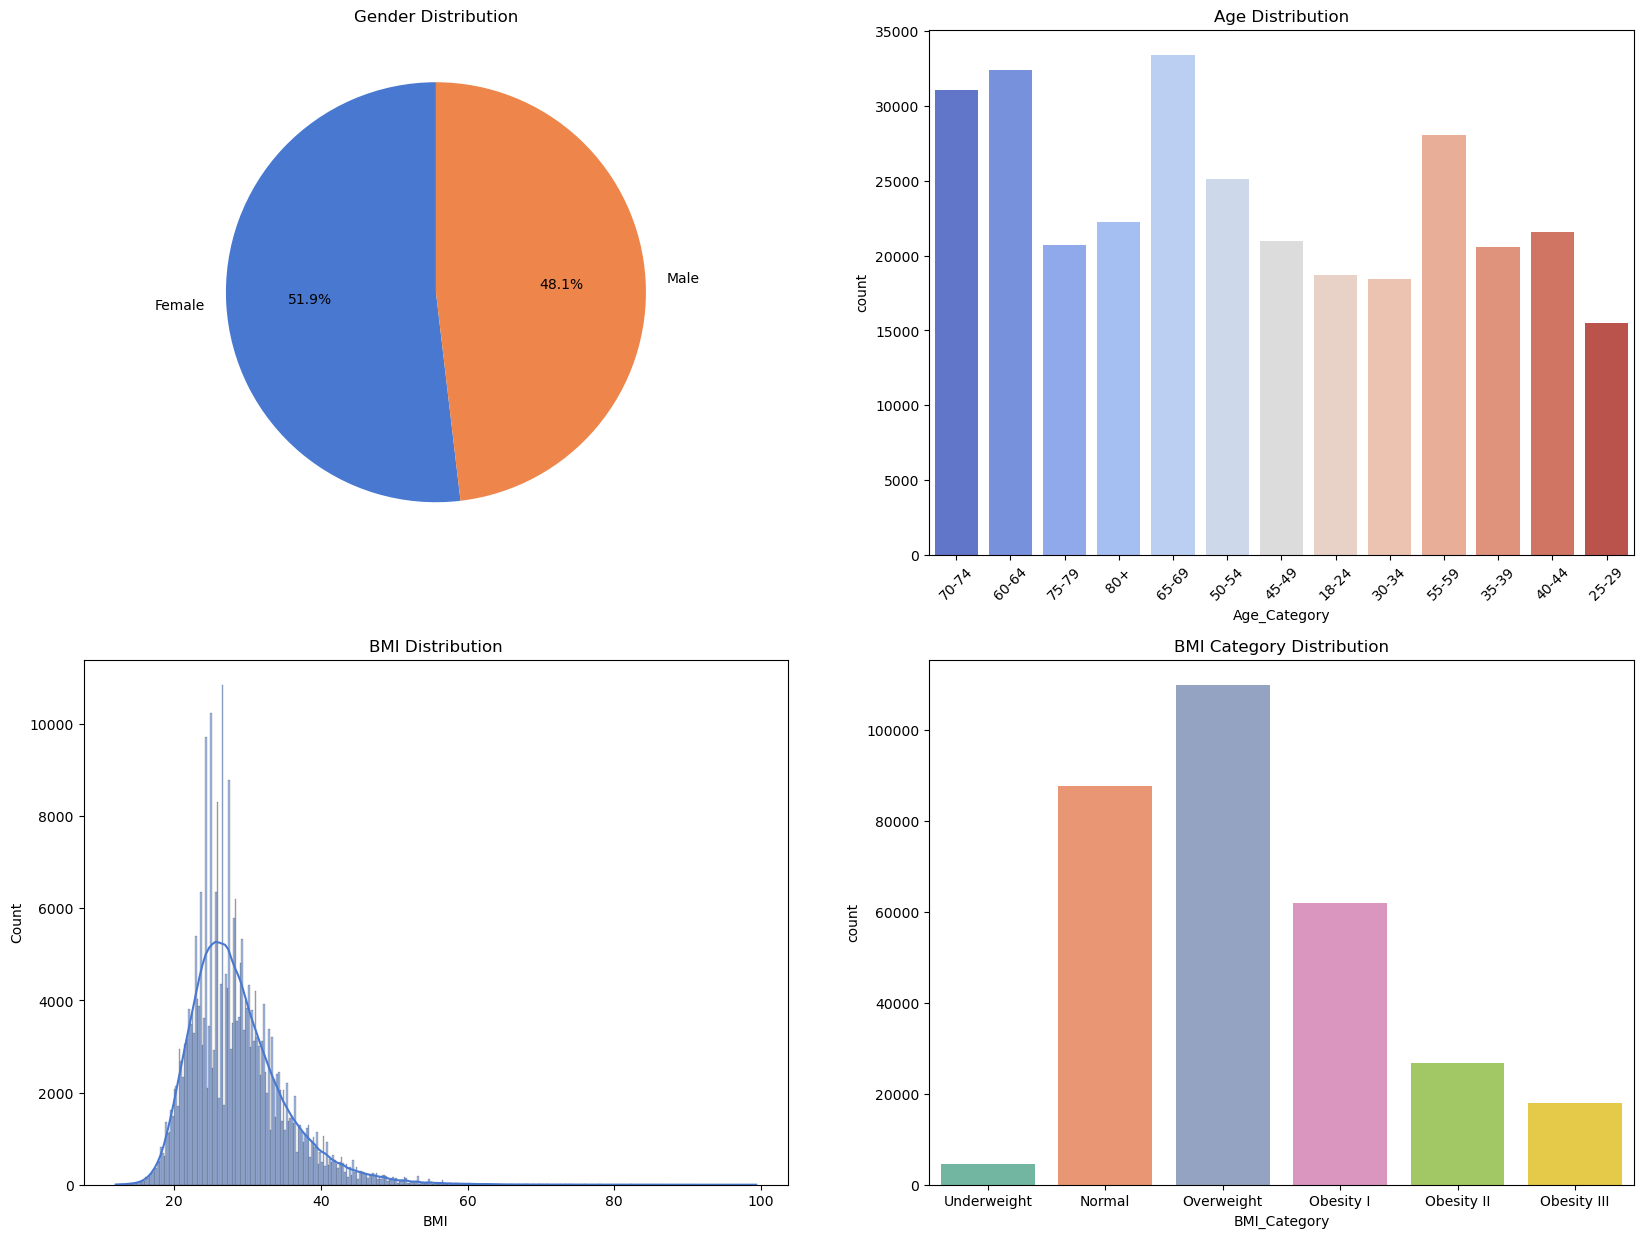

In [438]:
# Patient Demographics in data set to check spread of values
# To check if there are balanced classes of males, females, ages and BMI categories

fig, ax = plt.subplots(2,2, figsize=(20, 15))

# Distribution of gender in data set
counts = df['Sex'].value_counts()
ax[0,0].pie([counts.loc['Female'], counts.loc['Male']], # To ensure correct order of labels
          labels=['Female', 'Male'], 
          autopct='%1.1f%%', 
          startangle=90
          )
ax[0,0].set_title('Gender Distribution')

# Distribution of age in data set
sns.countplot(x='Age_Category', data=df, ax=ax[0,1], palette='coolwarm')
ax[0,1].set_title('Age Distribution')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)

# Distribution of BMI categories in data set
sns.histplot(x='BMI', data=df, ax=ax[1,0], kde=True, palette='Set1')
ax[1,0].set_title('BMI Distribution')  

# Distribution of BMI categories in data set
sns.countplot(x='BMI_Category', data=df, ax=ax[1,1], palette='Set2')
ax[1,1].set_title('BMI Category Distribution')

The EDA explains the patient demographics in the data set. From the pie chart, we can see that the dataset is balanced in terms of gender, with ~51.9% being males and 48.1% being females. 

The age distribution shows that the majority of patients are older than 40 years old. Hence, the dataset is skewed towards older individuals, which is typical for cardiovascular disease datasets.

The BMI distribution indicates that most patients fall within the normal to overweight categories, with a significant portion being classified as obese.

Therefore, we build a hypothesis that older individuals with higher BMI are more likely to have cardiovascular disease.

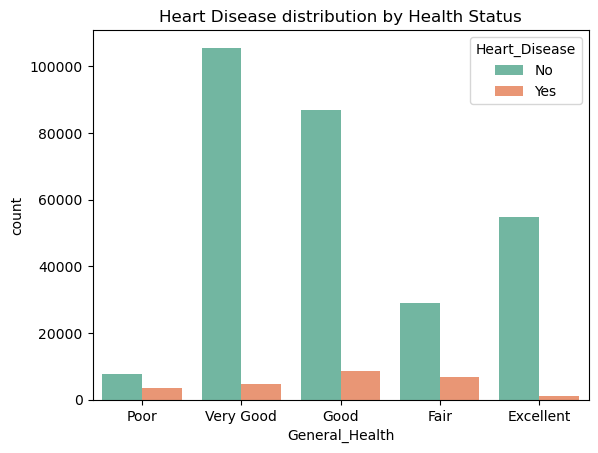

In [439]:
sns.countplot(x='General_Health', data=df, hue='Heart_Disease', palette='Set2').set_title('Heart Disease distribution by Health Status')
plt.show()

This graphs shows a constrast to the typical belief that people who are healthier have a lower probability of heart disease.

Patients with good health are portrayed to have a higher probability of heart disease, than patients with poor health. 

This could be due to external factors not captured by the data set. 

### Medical History

Text(0.5, 1.0, 'Arthritis')

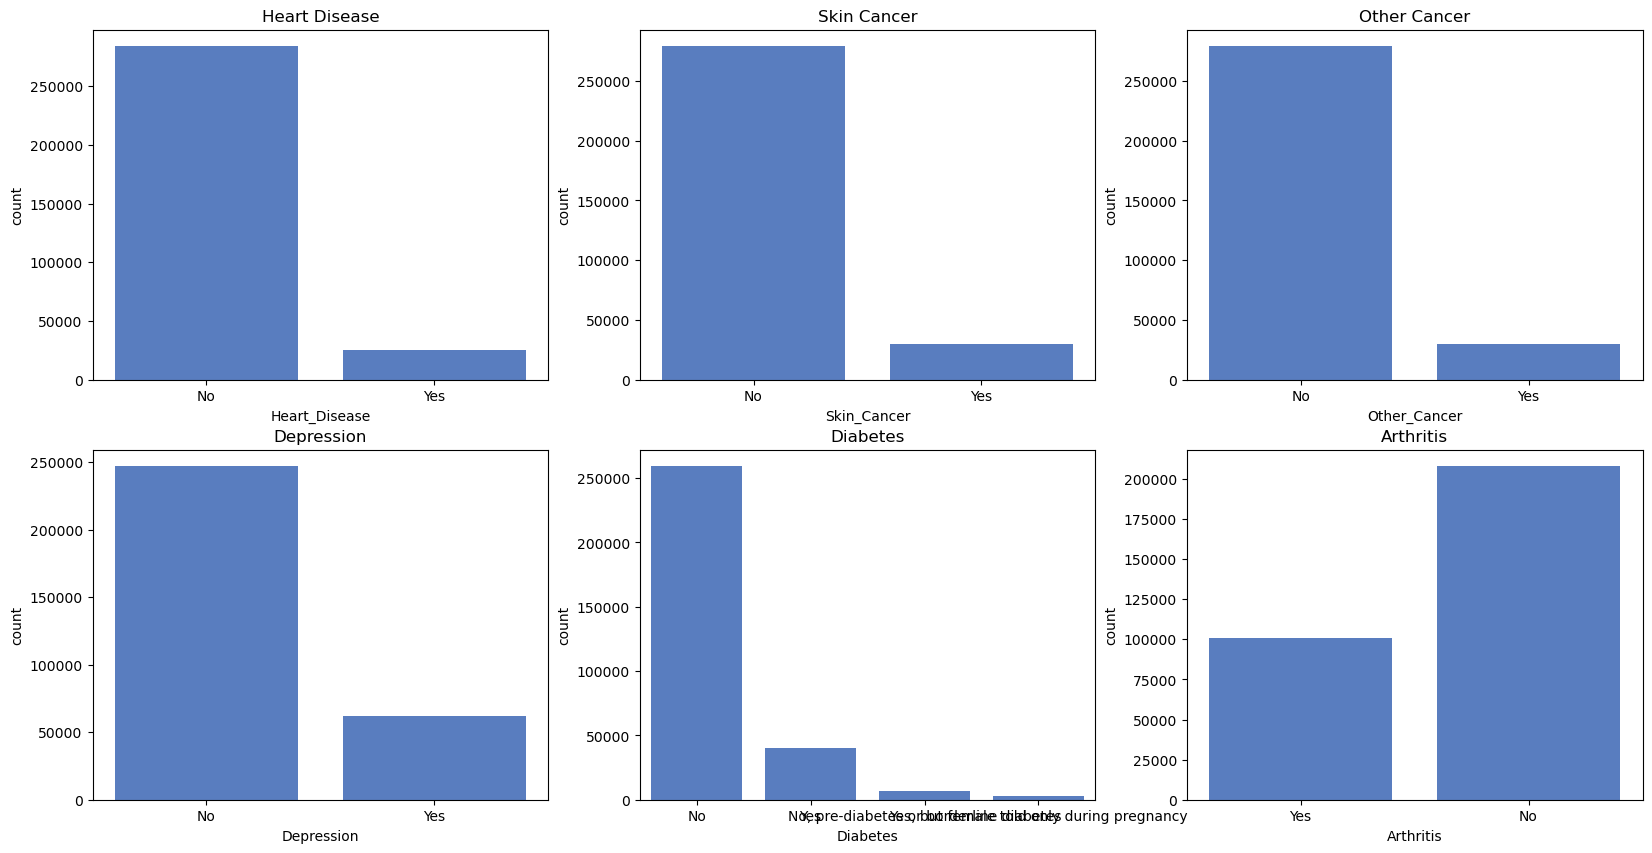

In [440]:
fig, ax = plt.subplots(2,3, figsize =(20,10))
sns.countplot(x = 'Heart_Disease', data = df, ax = ax[0,0]).set_title('Heart Disease')
sns.countplot(x = 'Skin_Cancer', data = df, ax = ax[0,1]).set_title('Skin Cancer')
sns.countplot(x = 'Other_Cancer', data = df, ax = ax[0,2]).set_title('Other Cancer')
sns.countplot(x = 'Depression', data = df, ax = ax[1,0]).set_title('Depression')
sns.countplot(x = 'Diabetes', data = df, ax = ax[1,1]).set_title('Diabetes')
sns.countplot(x = 'Arthritis', data = df, ax = ax[1,2]).set_title('Arthritis')

Data is skewed, there are higher proportion of peope with cancer than without for the various types of cancers. 

Hence, for prediction models, we must only consider classification models that are robust to skewed data.

1. Tree-based models (Robust to skewed data)
- Random Forest Classifier (Skew Handling Strength : Good)
- CatBoost (Skew Handling Strength : Very Good)
- XGBoost (Skew Handling Strength : Excellent)
- LightGBM (Skew Handling Strength : Excellent)

2. LogisticRegression(class_weight='balanced')
- Not as robust as trees for extreme imbalance

3. Naive Bayes
- May be biased towards majority class.

4. K-Nearest Neighbors (KNN)
- Not ideal with imbalance, gets heavily biased towards majority class. 

We will only consider tree based models and logistic regression in this study.

### Smoking History

Text(0.5, 1.0, 'Smoking History')

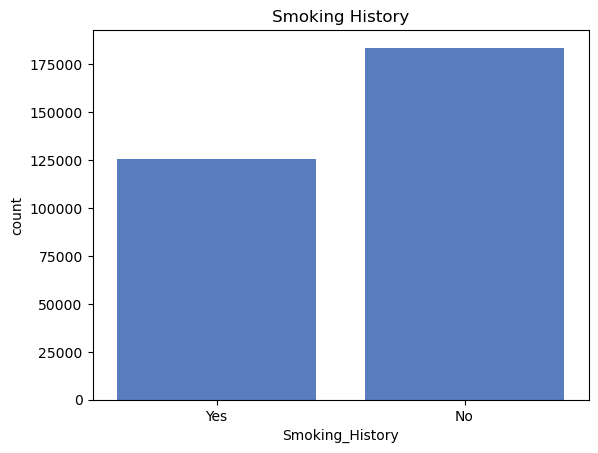

In [441]:
sns.countplot(x= 'Smoking_History', data = df).set_title('Smoking History')


### Checkup and Heart Disease

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Within the past 2 years'),
  Text(1, 0, 'Within the past year'),
  Text(2, 0, '5 or more years ago'),
  Text(3, 0, 'Within the past 5 years'),
  Text(4, 0, 'Never')])

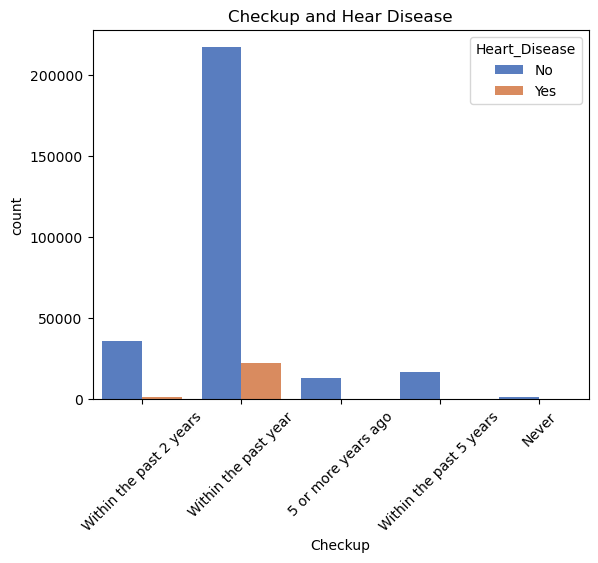

In [442]:
sns.countplot(x='Checkup', data = df, hue = 'Heart_Disease').set_title('Checkup and Hear Disease')
plt.xticks(rotation = 45)

### Exercise and Heart Disease

Text(0.5, 1.0, 'Exercise and Heart Disease')

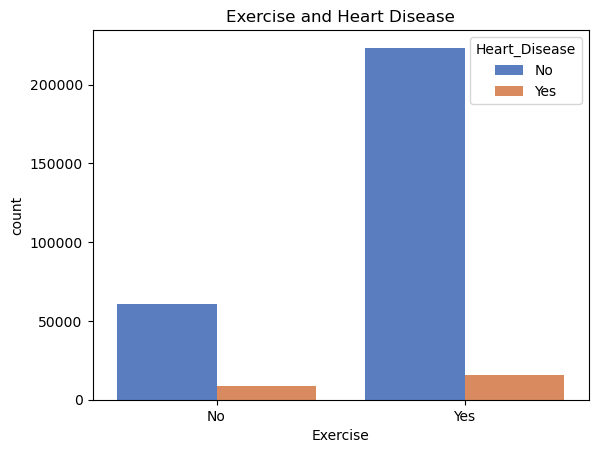

In [443]:
sns.countplot(x='Exercise', data = df, hue = 'Heart_Disease').set_title('Exercise and Heart Disease')

## Correlation between all variables and target variable

We will check the correlation between all variables and the target variable to identify which features are most relevant for predicting cardiovascular disease.

In [444]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,14.54,Yes,0.0,30.0,16.0,12.0,Underweight
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,28.29,No,0.0,30.0,0.0,4.0,Overweight
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,33.47,No,4.0,12.0,3.0,16.0,Obesity I
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,28.73,No,0.0,30.0,30.0,8.0,Overweight
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,24.37,Yes,0.0,8.0,4.0,0.0,Normal


In [445]:
from sklearn.preprocessing import LabelEncoder

# List of categorical variables
cols = ['General_Health','Checkup','Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis',	'Sex',	'Age_Category', 'Smoking_History']

# Label encoding object
le = LabelEncoder()

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

General_Health [3 4 2 1 0]
Checkup [2 4 0 3 1]
Exercise [0 1]
Heart_Disease [0 1]
Skin_Cancer [0 1]
Other_Cancer [0 1]
Depression [0 1]
Diabetes [0 2 1 3]
Arthritis [1 0]
Sex [0 1]
Age_Category [10  8 11 12  9  6  5  0  2  7  3  4  1]
Smoking_History [1 0]


In [446]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,BMI_Category
0,3,2,0,0,0,0,0,0,1,0,10,14.54,1,0.0,30.0,16.0,12.0,Underweight
1,4,4,0,1,0,0,0,2,0,0,10,28.29,0,0.0,30.0,0.0,4.0,Overweight
2,4,4,1,0,0,0,0,2,0,0,8,33.47,0,4.0,12.0,3.0,16.0,Obesity I
3,3,4,1,1,0,0,0,2,0,1,11,28.73,0,0.0,30.0,30.0,8.0,Overweight
4,2,4,0,0,0,0,0,0,0,1,12,24.37,1,0.0,8.0,4.0,0.0,Normal


In [447]:
# Drop BMI_Category in place
df.drop('BMI_Category', axis = 1, inplace = True)

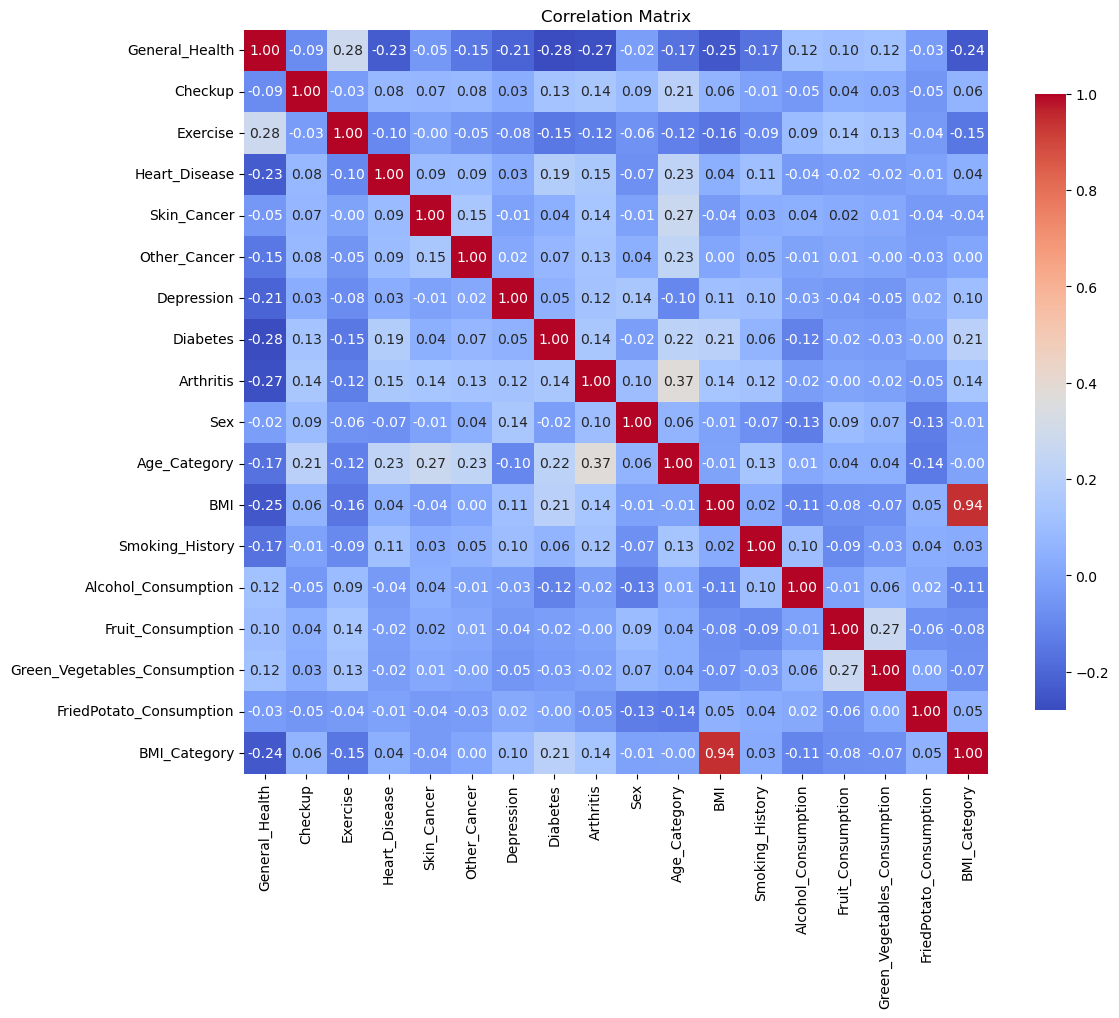

In [448]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap = 'coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

There is no major correlation between the variables.

## Train Test Split

In [449]:
X = df.drop(columns = ['Heart_Disease'])
y = df['Heart_Disease']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

## Model Selection


Model: Random_Forest


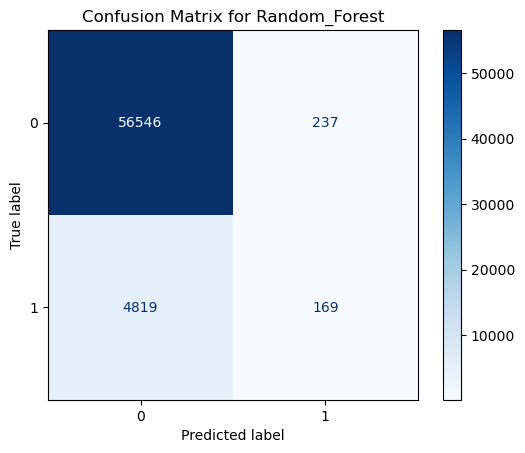


Model: Logistic_Regression


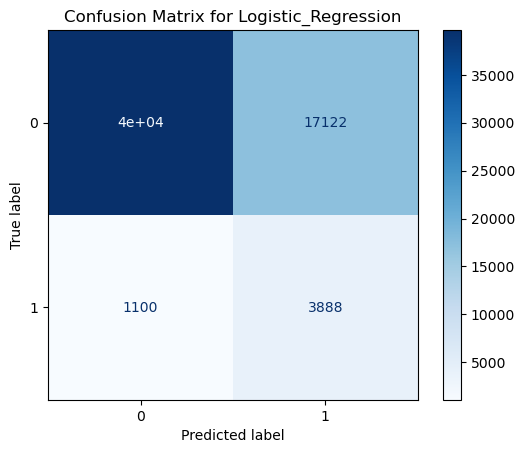


Model: Decision_Tree_Classifier


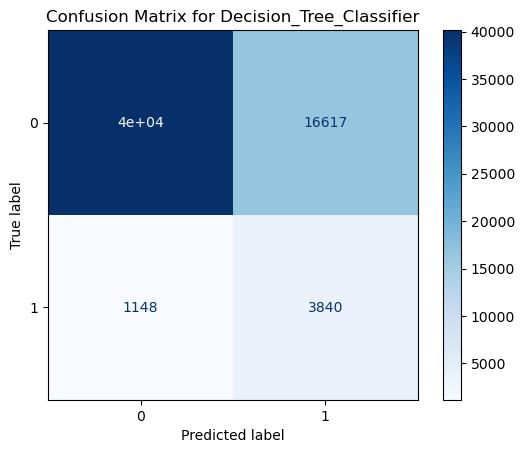


Performance Metrics:
                          Accuracy  F1 Score    Recall
Decision_Tree_Classifier  0.712405  0.301827  0.769848
Logistic_Regression       0.705007  0.299100  0.779471
Random_Forest             0.918149  0.062662  0.033881


In [453]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Initialize models with random_state=0
models = {
    'Random_Forest': RandomForestClassifier(class_weight='balanced', max_features='sqrt', n_estimators=200, random_state=0),
    'Logistic_Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0),
    'Decision_Tree_Classifier': DecisionTreeClassifier(class_weight='balanced', random_state=0, max_depth=12, min_samples_leaf=2, min_samples_split=2)
}

# Compare models
results = {}

for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Scores
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='binary')
    recall = recall_score(y_test, preds)

    results[name] = {
        'Accuracy': acc,
        'F1 Score': f1,
        'Recall': recall
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Show results sorted by F1 Score descending
results_df = pd.DataFrame(results).T.sort_values(by='F1 Score', ascending=False)
print("\nPerformance Metrics:")
print(results_df)


In conclusion, Random Forest Classifier performs the best. 